Theoretical Questions

Q.	1 Can we use Bagging for regression problems?

Answer :-

Yes, Bagging can be used for regression problems by employing regressors like DecisionTreeRegressor as base estimators. It reduces variance and helps avoid overfitting.

Q.	2. What is the difference between multiple model training and single model training?

Answer :-

Single model training uses one algorithm to make predictions. Multiple model training involves combining the outputs of several models to improve performance, reduce overfitting, and increase robustness.

Q.	3. Explain the concept of feature randomness in Random Forest.

Answer :-

In Random Forest, each tree considers only a random subset of features when splitting nodes. This feature randomness decorrelates trees, improving ensemble performance.

Q.	4. What is OOB (Out-of-Bag) Score?

Answer :-

OOB score is an internal validation score for Bagging and Random Forest models. It estimates accuracy using only the samples not included in each bootstrap sample.

Q. 5. How can you measure the importance of features in a Random Forest model?

Answer :-

Feature importance can be measured by the mean decrease in impurity (Gini or entropy) or permutation importance, showing how much each feature contributes to the model.

Q. 6. Explain the working principle of a Bagging Classifier.

Answer :-

Bagging Classifier builds multiple base classifiers on different bootstrap samples and aggregates their predictions (majority voting) to improve generalization.

Q.	7. How do you evaluate a Bagging Classifier’s performance?

Answer :-

It can be evaluated using accuracy, confusion matrix, precision, recall, F1-score, or ROC-AUC on test data or OOB samples.

Q.	8.  How does a Bagging Regressor work?

Answer :-

Similar to the classifier, Bagging Regressor trains multiple regressors on bootstrap samples and averages their outputs for final prediction.

Q. 9. What is the main advantage of ensemble techniques?

Answer :-

Ensemble techniques improve accuracy and generalization by combining multiple models, reducing variance and/or bias.

Q.	10. What is the main challenge of ensemble methods?

Answer :-

They increase model complexity, are computationally expensive, and can be harder to interpret compared to single models.

Q.	11. Explain the key idea behind ensemble techniques.

Answer :-

Ensemble learning combines multiple models to produce a more accurate and stable prediction than any individual model.

Q.	12. What is a Random Forest Classifier?

Answer :-

A Random Forest Classifier is an ensemble of Decision Trees built using bagging and feature randomness to improve classification accuracy.

Q.	13. What are the main types of ensemble techniques?

Answer :-

•	Bagging
•	Boosting
•	Stacking

Q.	14. What is ensemble learning in machine learning?

Answer :-

It is a technique where multiple models are trained and combined to solve a particular problem, aiming to achieve better performance.

Q.	15. When should we avoid using ensemble methods?

Answer :-

When interpretability and low computational cost are priorities, or when data is too small to benefit from ensemble techniques.

Q.	16. How does Bagging help in reducing overfitting?

Answer :-

By averaging multiple models trained on different bootstrap samples, Bagging reduces variance and thus overfitting.

Q.17. Why is Random Forest better than a single Decision Tree?

Answer :-

It combines multiple trees to reduce overfitting, increase robustness, and improve accuracy.

Q.	18. What is the role of bootstrap sampling in Bagging?

Answer :-

Bootstrap sampling provides diversity by training each base model on a randomly sampled subset (with replacement) of the training data.


Q.	19. What are some real-world applications of ensemble techniques?

Answer :-

•	Fraud detection
•	Credit scoring
•	Medical diagnosis
•	Stock market prediction
•	Customer churn prediction

Q.	20.  What is the difference between Bagging and Boosting?

Answer :-

•	Bagging: Reduces variance; trains models in parallel; uses bootstrap sampling.
•	Boosting: Reduces bias; trains models sequentially; focuses on correcting previous errors.


Practical Questions

In [ ]:
# Q.	21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy

# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target labels (0: malignant, 1: benign)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Bagging Classifier with Decision Trees
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=10,
    random_state=42
)

# Train the classifier
bagging_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_clf.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9561


In [ ]:
# Q. 22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).

# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
data = fetch_california_housing()
X = data.data  # Features
y = data.target  # Target (median house value)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor as the base estimator
base_dt = DecisionTreeRegressor(random_state=42)

# Initialize the Bagging Regressor
bagging_reg = BaggingRegressor(
    estimator=base_dt,
    n_estimators=50,
    random_state=42
)

# Train the model
bagging_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_reg.predict(X_test)

# Calculate and print Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) of Bagging Regressor: {mse:.2f}")

Mean Squared Error (MSE) of Bagging Regressor: 0.26


In [ ]:
# Q.	23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.

# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target labels (0: malignant, 1: benign)
feature_names = data.feature_names  # Feature names

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_clf.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf_clf.feature_importances_

# Create a DataFrame to display feature names and their importance scores
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance scores
print("Feature Importance Scores:")
print(importance_df)

Feature Importance Scores:
                    Feature  Importance
23               worst area    0.153892
27     worst concave points    0.144663
7       mean concave points    0.106210
20             worst radius    0.077987
6            mean concavity    0.068001
22          worst perimeter    0.067115
2            mean perimeter    0.053270
0               mean radius    0.048703
3                 mean area    0.047555
26          worst concavity    0.031802
13               area error    0.022407
21            worst texture    0.021749
25        worst compactness    0.020266
10             radius error    0.020139
5          mean compactness    0.013944
1              mean texture    0.013591
12          perimeter error    0.011303
24         worst smoothness    0.010644
28           worst symmetry    0.010120
16          concavity error    0.009386
4           mean smoothness    0.007285
19  fractal dimension error    0.005321
15        compactness error    0.005253
29  worst fra

In [ ]:
# Q.	24. Train a Random Forest Regressor and compare its performance with a single Decision Tree.

# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
data = fetch_california_housing()
X = data.data  # Features
y = data.target  # Target (median house value)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a single Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

# Predict and evaluate Decision Tree
dt_pred = dt_reg.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)

# Initialize and train a Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Predict and evaluate Random Forest
rf_pred = rf_reg.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)

# Print performance comparison
print("Performance Comparison:")
print(f"Decision Tree Regressor MSE: {dt_mse:.2f}")
print(f"Random Forest Regressor MSE: {rf_mse:.2f}")
print(f"MSE Improvement (DT - RF): {dt_mse - rf_mse:.2f}")

Performance Comparison:
Decision Tree Regressor MSE: 0.50
Random Forest Regressor MSE: 0.26
MSE Improvement (DT - RF): 0.24


In [ ]:
# Q.	25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.

# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target labels (0: malignant, 1: benign)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier with OOB score enabled
rf_clf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)

# Train the classifier
rf_clf.fit(X_train, y_train)

# Get the OOB score
oob_score = rf_clf.oob_score_

# Print the OOB score
print(f"Out-of-Bag (OOB) Score: {oob_score:.4f}")

Out-of-Bag (OOB) Score: 0.9560


In [ ]:
# Q.	26. Train a Bagging Classifier using SVM as a base estimator and print accuracy.

# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target labels (0: malignant, 1: benign)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the SVM as the base estimator
base_svm = SVC(kernel='rbf', random_state=42)

# Initialize the Bagging Classifier with SVM
bagging_clf = BaggingClassifier(
    estimator=base_svm,
    n_estimators=10,
    random_state=42
)

# Train the classifier
bagging_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_clf.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Bagging Classifier with SVM: {accuracy:.4f}")

Accuracy of Bagging Classifier with SVM: 0.9649


In [ ]:
# Q.	27. Train a Random Forest Classifier with different numbers of trees and compare accuracy.

# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target labels (0: malignant, 1: benign)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different numbers of trees to test
n_estimators_list = [10, 50, 100, 200, 500]

# Store results
results = []

# Train and evaluate Random Forest for each number of trees
for n in n_estimators_list:
    # Initialize the Random Forest Classifier
    rf_clf = RandomForestClassifier(n_estimators=n, random_state=42)

    # Train the classifier
    rf_clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store results
    results.append({'n_estimators': n, 'Accuracy': accuracy})

# Create a DataFrame to display results
results_df = pd.DataFrame(results)

# Print the comparison table
print("Accuracy Comparison for Different Numbers of Trees:")
print(results_df)

Accuracy Comparison for Different Numbers of Trees:
   n_estimators  Accuracy
0            10  0.956140
1            50  0.964912
2           100  0.964912
3           200  0.964912
4           500  0.964912


In [ ]:
# Q.	28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC scores.

# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target labels (0: malignant, 1: benign)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Logistic Regression as the base estimator
base_lr = LogisticRegression(random_state=42)

# Initialize the Bagging Classifier with Logistic Regression
bagging_clf = BaggingClassifier(
    estimator=base_lr,
    n_estimators=10,
    random_state=42
)

# Train the classifier
bagging_clf.fit(X_train, y_train)

# Predict probabilities for AUC calculation
y_pred_proba = bagging_clf.predict_proba(X_test)[:, 1]  # Probability for positive class (benign)

# Calculate and print AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score of Bagging Classifier with Logistic Regression: {auc:.4f}")

AUC Score of Bagging Classifier with Logistic Regression: 0.9964


In [ ]:
# Q.	29. Train a Random Forest Regressor and analyze feature importance scores.

# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# Load the California Housing dataset
data = fetch_california_housing()
X = data.data  # Features
y = data.target  # Target (median house value)
feature_names = data.feature_names  # Feature names

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf_reg.feature_importances_

# Create a DataFrame to display feature names and their importance scores
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance scores
print("Feature Importance Scores:")
print(importance_df)

# Optional: Print basic analysis
print("\nAnalysis:")
print(f"Most important feature: {importance_df.iloc[0]['Feature']} (Importance: {importance_df.iloc[0]['Importance']:.4f})")
print(f"Least important feature: {importance_df.iloc[-1]['Feature']} (Importance: {importance_df.iloc[-1]['Importance']:.4f})")
print(f"Top 3 features contribute {importance_df['Importance'].iloc[:3].sum():.4f} of total importance")

Feature Importance Scores:
      Feature  Importance
0      MedInc    0.524871
5    AveOccup    0.138443
6    Latitude    0.088936
7   Longitude    0.088629
1    HouseAge    0.054593
2    AveRooms    0.044272
4  Population    0.030650
3   AveBedrms    0.029606

Analysis:
Most important feature: MedInc (Importance: 0.5249)
Least important feature: AveBedrms (Importance: 0.0296)
Top 3 features contribute 0.7523 of total importance


In [ ]:
# Q.	30. Train an ensemble model using both Bagging and Random Forest and compare accuracy.

# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target labels (0: malignant, 1: benign)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Bagging Classifier with Decision Trees
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=100,
    random_state=42
)

# Train the Bagging Classifier
bagging_clf.fit(X_train, y_train)

# Make predictions with Bagging Classifier
bagging_pred = bagging_clf.predict(X_test)

# Calculate accuracy for Bagging Classifier
bagging_accuracy = accuracy_score(y_test, bagging_pred)

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest Classifier
rf_clf.fit(X_train, y_train)

# Make predictions with Random Forest Classifier
rf_pred = rf_clf.predict(X_test)

# Calculate accuracy for Random Forest Classifier
rf_accuracy = accuracy_score(y_test, rf_pred)

# Create a DataFrame to compare accuracies
results_df = pd.DataFrame({
    'Model': ['Bagging Classifier', 'Random Forest Classifier'],
    'Accuracy': [bagging_accuracy, rf_accuracy]
})

# Print the comparison table
print("Accuracy Comparison:")
print(results_df)

Accuracy Comparison:
                      Model  Accuracy
0        Bagging Classifier  0.956140
1  Random Forest Classifier  0.964912


In [ ]:
# Q.	31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.

# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target labels (0: malignant, 1: benign)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Make predictions on the test set with the best model
y_pred = best_rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print(f"Accuracy of Best Random Forest Classifier: {accuracy:.4f}")

# Optional: Display top 5 parameter combinations
results = pd.DataFrame(grid_search.cv_results_)
top_results = results[['params', 'mean_test_score', 'std_test_score']].sort_values(by='mean_test_score', ascending=False).head(5)
print("\nTop 5 Parameter Combinations:")
print(top_results)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy of Best Random Forest Classifier: 0.9649

Top 5 Parameter Combinations:
                                               params  mean_test_score  \
2   {'max_depth': None, 'min_samples_leaf': 1, 'mi...         0.962637   
56  {'max_depth': 20, 'min_samples_leaf': 1, 'min_...         0.962637   
29  {'max_depth': 10, 'min_samples_leaf': 1, 'min_...         0.962637   
13  {'max_depth': None, 'min_samples_leaf': 2, 'mi...         0.958242   
1   {'max_depth': None, 'min_samples_leaf': 1, 'mi...         0.958242   

    std_test_score  
2         0.013187  
56        0.013187  
29        0.013187  
13        0.012815  
1         0.017582  


In [ ]:
# Q.	32. Train a Bagging Regressor with different numbers of base estimators and compare performance.

# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

# Load the California Housing dataset
data = fetch_california_housing()
X = data.data  # Features
y = data.target  # Target (median house value)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different numbers of base estimators to test
n_estimators_list = [10, 50, 100, 200, 500]

# Store results
results = []

# Train and evaluate Bagging Regressor for each number of estimators
for n in n_estimators_list:
    # Initialize the Bagging Regressor with Decision Trees
    bagging_reg = BaggingRegressor(
        estimator=DecisionTreeRegressor(random_state=42),
        n_estimators=n,
        random_state=42
    )

    # Train the regressor
    bagging_reg.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = bagging_reg.predict(X_test)

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)

    # Store results
    results.append({'n_estimators': n, 'MSE': mse})

# Create a DataFrame to display results
results_df = pd.DataFrame(results)

# Print the comparison table
print("Performance Comparison (MSE) for Different Numbers of Base Estimators:")
print(results_df)

# Optional: Print analysis
print("\nAnalysis:")
print(f"Best MSE: {results_df['MSE'].min():.4f} (n_estimators={results_df.loc[results_df['MSE'].idxmin(), 'n_estimators']})")
print(f"Worst MSE: {results_df['MSE'].max():.4f} (n_estimators={results_df.loc[results_df['MSE'].idxmax(), 'n_estimators']})")

Performance Comparison (MSE) for Different Numbers of Base Estimators:
   n_estimators       MSE
0            10  0.282424
1            50  0.257299
2           100  0.255924
3           200  0.254093
4           500  0.252442

Analysis:
Best MSE: 0.2524 (n_estimators=500)
Worst MSE: 0.2824 (n_estimators=10)


In [ ]:
# Q.	33. Train a Random Forest Classifier and analyze misclassified samples.

# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target labels (0: malignant, 1: benign)
feature_names = data.feature_names  # Feature names
target_names = data.target_names  # Target names (malignant, benign)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest Classifier: {accuracy:.4f}")

# Identify misclassified samples
misclassified_indices = np.where(y_test != y_pred)[0]

# Create a DataFrame to store misclassified samples
misclassified_data = []

for idx in misclassified_indices:
    misclassified_data.append({
        'Index': idx,
        'True Label': target_names[y_test[idx]],
        'Predicted Label': target_names[y_pred[idx]],
        **{feature_names[i]: X_test[idx, i] for i in range(X_test.shape[1])}
    })

misclassified_df = pd.DataFrame(misclassified_data)

# Print analysis of misclassified samples
print("\nAnalysis of Misclassified Samples:")
if not misclassified_df.empty:
    print(f"Number of misclassified samples: {len(misclassified_df)}")
    print("\nMisclassified Samples Details:")
    print(misclassified_df)
else:
    print("No misclassified samples found.")

# Optional: Summary statistics of misclassified vs. all test samples for key features
if not misclassified_df.empty:
    key_features = feature_names[:5]  # Analyze first 5 features for brevity
    print("\nSummary Statistics Comparison (Misclassified vs. All Test Samples):")
    for feature in key_features:
        misclassified_values = misclassified_df[feature].values
        all_test_values = X_test[:, np.where(feature_names == feature)[0][0]]
        print(f"\n{feature}:")
        print(f"  Misclassified - Mean: {np.mean(misclassified_values):.4f}, Std: {np.std(misclassified_values):.4f}")
        print(f"  All Test      - Mean: {np.mean(all_test_values):.4f}, Std: {np.std(all_test_values):.4f}")

Accuracy of Random Forest Classifier: 0.9649

Analysis of Misclassified Samples:
Number of misclassified samples: 4

Misclassified Samples Details:
   Index True Label Predicted Label  mean radius  mean texture  \
0      8     benign       malignant        13.34         15.86   
1     20  malignant          benign        13.80         15.79   
2     77  malignant          benign        13.96         17.05   
3     82  malignant          benign        14.48         21.46   

   mean perimeter  mean area  mean smoothness  mean compactness  \
0           86.49      520.0          0.10780           0.15350   
1           90.43      584.1          0.10070           0.12800   
2           91.43      602.4          0.10960           0.12790   
3           94.25      648.2          0.09444           0.09947   

   mean concavity  ...  worst radius  worst texture  worst perimeter  \
0         0.11690  ...         15.53          23.19            96.66   
1         0.07789  ...         16.57     

In [ ]:
# Q.	34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.

# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target labels (0: malignant, 1: benign)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a single Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Make predictions with Decision Tree
dt_pred = dt_clf.predict(X_test)

# Calculate accuracy for Decision Tree
dt_accuracy = accuracy_score(y_test, dt_pred)

# Initialize and train the Bagging Classifier with Decision Trees
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=100,
    random_state=42
)
bagging_clf.fit(X_train, y_train)

# Make predictions with Bagging Classifier
bagging_pred = bagging_clf.predict(X_test)

# Calculate accuracy for Bagging Classifier
bagging_accuracy = accuracy_score(y_test, bagging_pred)

# Create a DataFrame to compare accuracies
results_df = pd.DataFrame({
    'Model': ['Decision Tree Classifier', 'Bagging Classifier'],
    'Accuracy': [dt_accuracy, bagging_accuracy]
})

# Print the comparison table
print("Performance Comparison (Accuracy):")
print(results_df)

# Optional: Print improvement
print(f"\nAccuracy Improvement (Bagging - DT): {bagging_accuracy - dt_accuracy:.4f}")

Performance Comparison (Accuracy):
                      Model  Accuracy
0  Decision Tree Classifier  0.947368
1        Bagging Classifier  0.956140

Accuracy Improvement (Bagging - DT): 0.0088


Accuracy of Random Forest Classifier: 0.9649


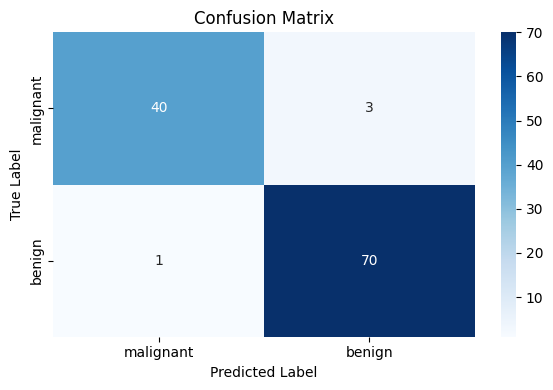

In [ ]:
# Q.	35. Train a Random Forest Classifier and visualize the confusion matrix.

# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target labels (0: malignant, 1: benign)
target_names = data.target_names  # Target names (malignant, benign)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest Classifier: {accuracy:.4f}")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()

# Save the plot (optional, comment out if not needed)
plt.savefig('confusion_matrix.png')
plt.show()

In [ ]:
# Q.	36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy.

# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target labels (0: malignant, 1: benign)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for SVM and Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize base learners
dt_clf = DecisionTreeClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)  # probability=True for stacking
lr_clf = LogisticRegression(random_state=42)

# Train and evaluate individual base learners
classifiers = {
    'Decision Tree': dt_clf,
    'SVM': svm_clf,
    'Logistic Regression': lr_clf
}

results = []

# Evaluate individual classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({'Model': name, 'Accuracy': accuracy})

# Initialize the Stacking Classifier
estimators = [
    ('dt', dt_clf),
    ('svm', svm_clf),
    ('lr', lr_clf)
]
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(random_state=42),
    cv=5
)

# Train the Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Make predictions with Stacking Classifier
stacking_pred = stacking_clf.predict(X_test)

# Calculate accuracy for Stacking Classifier
stacking_accuracy = accuracy_score(y_test, stacking_pred)
results.append({'Model': 'Stacking Classifier', 'Accuracy': stacking_accuracy})

# Create a DataFrame to compare accuracies
results_df = pd.DataFrame(results)

# Print the comparison table
print("Accuracy Comparison:")
print(results_df)

# Optional: Print the best performing model
print(f"\nBest Model: {results_df.loc[results_df['Accuracy'].idxmax(), 'Model']} "
      f"(Accuracy: {results_df['Accuracy'].max():.4f})")

Accuracy Comparison:
                 Model  Accuracy
0        Decision Tree  0.947368
1                  SVM  0.982456
2  Logistic Regression  0.973684
3  Stacking Classifier  0.973684

Best Model: SVM (Accuracy: 0.9825)


In [ ]:
# Q.	37. Train a Random Forest Classifier and print the top 5 most important features.

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance and display top 5
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(5)
print("Top 5 Important Features:")
print(top_features)


Top 5 Important Features:
             Feature  Importance
2  petal length (cm)    0.439994
3   petal width (cm)    0.421522
0  sepal length (cm)    0.108098
1   sepal width (cm)    0.030387


In [2]:
# Q.	38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.

# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Bagging Classifier with Decision Trees as base estimator
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(),
                           n_estimators=10,
                           random_state=42)

# Train the classifier
bagging.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging.predict(X_test)

# Calculate performance metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print results
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-score (weighted): {f1:.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names)

Precision (weighted): 0.9561
Recall (weighted): 0.9561
F1-score (weighted): 0.9560

Detailed Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        43
      benign       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



max_depth = 1, Accuracy = 1.00
max_depth = 2, Accuracy = 1.00
max_depth = 3, Accuracy = 1.00
max_depth = 4, Accuracy = 1.00
max_depth = 5, Accuracy = 1.00


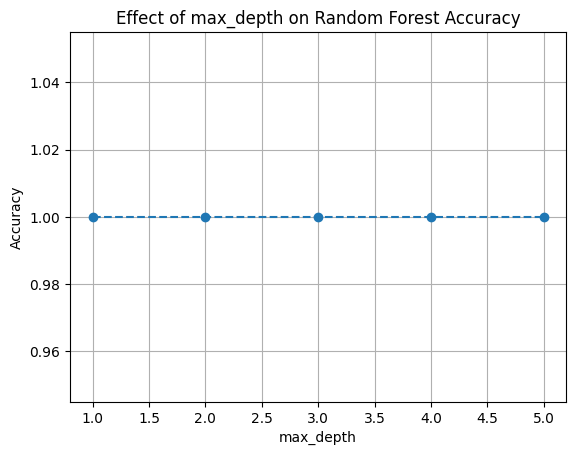

In [3]:
# Q.	39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Range of max_depth values to test
depth_values = range(1, 6)
accuracies = []

# Train and evaluate Random Forest for different max_depth values
for depth in depth_values:
    rf = RandomForestClassifier(max_depth=depth, n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"max_depth = {depth}, Accuracy = {acc:.2f}")

# Plot results
plt.plot(depth_values, accuracies, marker='o', linestyle='--')
plt.title('Effect of max_depth on Random Forest Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [4]:
# Q.	40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance.

# Import necessary libraries
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the Diabetes dataset
data = load_diabetes()
X = data.data
y = data.target

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base estimators
dt_base = DecisionTreeRegressor(random_state=42)
knn_base = KNeighborsRegressor()

# Initialize Bagging Regressors with different base estimators
bagging_dt = BaggingRegressor(estimator=dt_base, n_estimators=10, random_state=42)
bagging_knn = BaggingRegressor(estimator=knn_base, n_estimators=10, random_state=42)

# Train both models
bagging_dt.fit(X_train, y_train)
bagging_knn.fit(X_train, y_train)

# Make predictions
y_pred_dt = bagging_dt.predict(X_test)
y_pred_knn = bagging_knn.predict(X_test)

# Calculate performance metrics
metrics = {
    'DecisionTree': {
        'MSE': mean_squared_error(y_test, y_pred_dt),
        'MAE': mean_absolute_error(y_test, y_pred_dt),
        'R2': r2_score(y_test, y_pred_dt)
    },
    'KNeighbors': {
        'MSE': mean_squared_error(y_test, y_pred_knn),
        'MAE': mean_absolute_error(y_test, y_pred_knn),
        'R2': r2_score(y_test, y_pred_knn)
    }
}

# Print results
print("Performance Comparison of Bagging Regressors:")
print("\nBagging with DecisionTreeRegressor:")
print(f"MSE: {metrics['DecisionTree']['MSE']:.4f}")
print(f"MAE: {metrics['DecisionTree']['MAE']:.4f}")
print(f"R2 Score: {metrics['DecisionTree']['R2']:.4f}")

print("\nBagging with KNeighborsRegressor:")
print(f"MSE: {metrics['KNeighbors']['MSE']:.4f}")
print(f"MAE: {metrics['KNeighbors']['MAE']:.4f}")
print(f"R2 Score: {metrics['KNeighbors']['R2']:.4f}")

Performance Comparison of Bagging Regressors:

Bagging with DecisionTreeRegressor:
MSE: 3256.9618
MAE: 46.1326
R2 Score: 0.3853

Bagging with KNeighborsRegressor:
MSE: 2990.6536
MAE: 41.8591
R2 Score: 0.4355


In [ ]:
# Q.	41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_proba = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.2f}")


ROC-AUC Score: 1.00


In [5]:
#  Q.	42. Train a Bagging Classifier and evaluate its performance using cross-validation.

# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import numpy as np

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Bagging Classifier with Decision Trees as base estimator
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(),
                           n_estimators=10,
                           random_state=42)

# Perform 5-fold cross-validation on the training set
cv_scores = cross_val_score(bagging, X_train, y_train, cv=5, scoring='accuracy')

# Train the classifier on the full training set
bagging.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging.predict(X_test)

# Print cross-validation results
print("5-Fold Cross-Validation Results:")
print(f"Accuracy Scores per Fold: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

# Print detailed classification report for test set
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))


5-Fold Cross-Validation Results:
Accuracy Scores per Fold: [0.94505495 0.91208791 0.94505495 0.95604396 0.92307692]
Mean CV Accuracy: 0.9363
Standard Deviation: 0.0162

Test Set Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        43
      benign       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



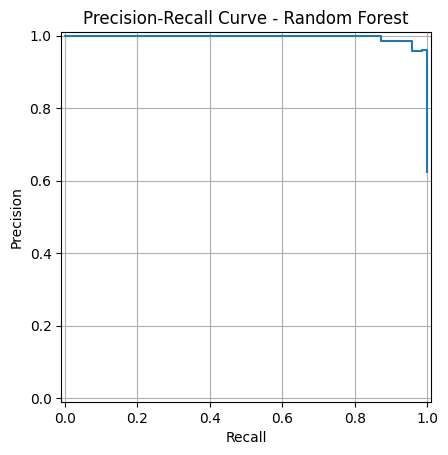

In [ ]:
# Q.	43. Train a Random Forest Classifier and plot the Precision-Recall curve.

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict probabilities
y_scores = rf_model.predict_proba(X_test)[:, 1]

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot the Precision-Recall Curve
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Curve - Random Forest")
plt.grid(True)
plt.show()


In [ ]:
# Q.	44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base learners
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)

# Stacking Classifier (meta-learner is Logistic Regression)
stack_model = StackingClassifier(
    estimators=[('rf', rf), ('lr', lr)],
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5
)

# Train and evaluate individual models
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)
stack_model.fit(X_train, y_train)

# Predictions
rf_pred = rf.predict(X_test)
lr_pred = lr.predict(X_test)
stack_pred = stack_model.predict(X_test)

# Accuracy scores
rf_acc = accuracy_score(y_test, rf_pred)
lr_acc = accuracy_score(y_test, lr_pred)
stack_acc = accuracy_score(y_test, stack_pred)

# Print results
print(f"Random Forest Accuracy: {rf_acc:.2f}")
print(f"Logistic Regression Accuracy: {lr_acc:.2f}")
print(f"Stacking Classifier Accuracy: {stack_acc:.2f}")


Random Forest Accuracy: 0.96
Logistic Regression Accuracy: 0.96
Stacking Classifier Accuracy: 0.96


In [6]:
# Q.	45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

# Import necessary libraries
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the Diabetes dataset
data = load_diabetes()
X = data.data
y = data.target

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different max_samples values to test
max_samples_values = [0.3, 0.6, 1.0]

# Dictionary to store metrics for each max_samples value
metrics = {}

# Train and evaluate Bagging Regressor for each max_samples value
for max_samples in max_samples_values:
    # Initialize Bagging Regressor with DecisionTreeRegressor
    bagging = BaggingRegressor(
        estimator=DecisionTreeRegressor(random_state=42),
        n_estimators=10,
        max_samples=max_samples,
        random_state=42
    )

    # Train the model
    bagging.fit(X_train, y_train)

    # Make predictions
    y_pred = bagging.predict(X_test)

    # Calculate performance metrics
    metrics[max_samples] = {
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }

# Print performance comparison
print("Performance Comparison of Bagging Regressor with Different max_samples:")
for max_samples in max_samples_values:
    print(f"\nmax_samples = {max_samples}:")
    print(f"MSE: {metrics[max_samples]['MSE']:.4f}")
    print(f"MAE: {metrics[max_samples]['MAE']:.4f}")
    print(f"R2 Score: {metrics[max_samples]['R2']:.4f}")


Performance Comparison of Bagging Regressor with Different max_samples:

max_samples = 0.3:
MSE: 3173.6067
MAE: 45.6225
R2 Score: 0.4010

max_samples = 0.6:
MSE: 3068.3825
MAE: 45.4135
R2 Score: 0.4209

max_samples = 1.0:
MSE: 3256.9618
MAE: 46.1326
R2 Score: 0.3853
